In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, draw, show, ion

In [2]:
def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)

def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)

def gibbs_sampling(mus, sigmas, last_y, iter=1):
    samples = np.zeros((iter, 2))
    y = last_y

    for i in range(iter):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples[i, :] = [x, y]

    return samples

In [27]:
allsamples[-1,1]

3.4670040607808827

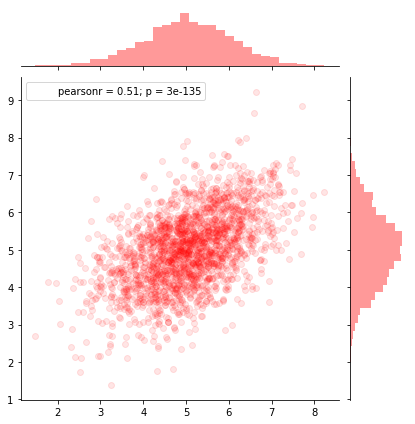

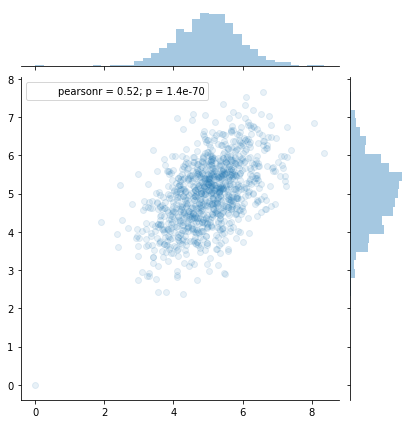

In [34]:
mus = np.array([5, 5])
sigmas = np.array([[1, .5], 
                   [.5, 1]])
jointsamples = np.random.multivariate_normal(mus, sigmas, 2000)
figjoint = sns.jointplot(jointsamples[:, 0], jointsamples[:, 1], color="r", alpha = 0.1)
figjoint = draw()

allsamples = np.zeros((1, 2))
allsamples[0,1] = 0;
allsamples[0,0] = 0;

for j in range(1000):
    samples = gibbs_sampling(mus, sigmas, allsamples[-1,1])
    allsamples = np.concatenate((allsamples, samples), axis=0)

fig =  sns.jointplot(allsamples[:, 0], allsamples[:, 1], alpha = 0.1)